# **Clustering Data Migrasi Kota Bekasi Menggunakan Metode KMeans Clustering**

Import library yg dibutuhkan

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

Membaca Dataset

In [29]:
dfmgr = pd.read_csv('migrasi_kota_bekasi.csv')

Summary Dataset

In [30]:
dfmgr.head()

,nama_desa_kelurahan,total_migrasi_masuk,total_migrasi_keluar
0,BEKASIJAYA,5989,7336
1,MARGAHAYU,4237,7343
2,DURENJAYA,5285,7284
3,ARENJAYA,4300,6458
4,BINTARA,4491,6112


In [31]:
dfmgr.describe()

,total_migrasi_masuk,total_migrasi_keluar
count,56.000000,56.000000
mean,3479.910714,4057.482143
std,1379.316145,2013.340517
min,1316.000000,1017.000000
25%,2483.000000,2558.750000
50%,3199.000000,3575.500000
75%,4372.750000,5340.500000
max,7211.000000,8826.000000


In [32]:
dfmgr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   nama_desa_kelurahan   56 non-null     object
 1   total_migrasi_masuk   56 non-null     int64 
 2   total_migrasi_keluar  56 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.4+ KB


Visualisasi Dataset

Text(0.5, 1.0, 'Sebaran Migrasi di Kota Bekasi')

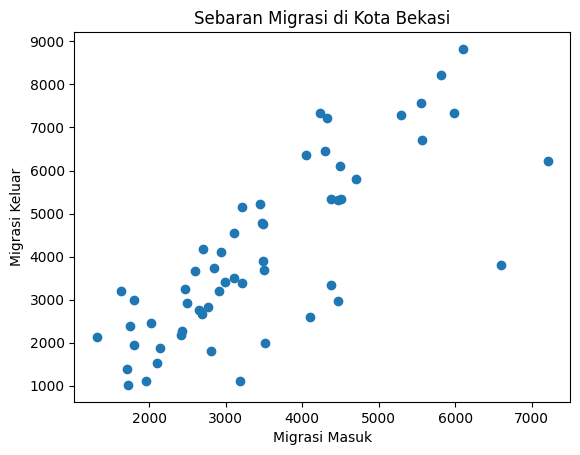

In [33]:
plt.scatter(dfmgr['total_migrasi_masuk'],dfmgr['total_migrasi_keluar'])
plt.xlabel("Migrasi Masuk")
plt.ylabel("Migrasi Keluar")
plt.title("Sebaran Migrasi di Kota Bekasi")

Membagi dataset menjadi data latih

In [34]:
x_train = dfmgr[['total_migrasi_masuk','total_migrasi_keluar']].values

Normalisasi Data

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train=scaler.fit_transform(x_train)

In [36]:
x_train

array([[0.79270568, 0.80919452],
       [0.49550466, 0.81009092],
       [0.67328244, 0.80253554],
       [0.50619169, 0.69676015],
       [0.53859203, 0.6524523 ],
       [0.32094996, 0.53015751],
       [0.2351145 , 0.40440517],
       [0.19541985, 0.28672045],
       [0.51094148, 0.79485209],
       [0.81119593, 1.        ],
       [0.27005937, 0.28031758],
       [0.1884648 , 0.160712  ],
       [0.57438507, 0.61288257],
       [0.07430025, 0.17556665],
       [0.71840543, 0.839288  ],
       [0.51891433, 0.55384812],
       [0.        , 0.14214368],
       [0.22544529, 0.22179536],
       [0.3706531 , 0.34216929],
       [0.46259542, 0.68536304],
       [0.76352841, 0.92278141],
       [0.54130619, 0.55359201],
       [0.27616624, 0.39556922],
       [0.36234097, 0.53937764],
       [0.05343511, 0.27839672],
       [0.11976251, 0.18427456],
       [0.71993215, 0.72954284],
       [0.08295165, 0.25342553],
       [0.32145886, 0.30477654],
       [0.19881255, 0.24407735],
       [0.

Melakukan Clustering KMeans

In [37]:
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters=2)
kmean

KMeans(n_clusters=2)

In [38]:
y_cluster = kmean.fit_predict(x_train)

In [39]:
y_cluster

array([1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0], dtype=int32)

Menambahkan Kolom Cluster

In [40]:
dfmgr['cluster'] = y_cluster

In [41]:
dfmgr

,nama_desa_kelurahan,total_migrasi_masuk,total_migrasi_keluar,cluster
0,BEKASIJAYA,5989,7336,1
1,MARGAHAYU,4237,7343,1
2,DURENJAYA,5285,7284,1
3,ARENJAYA,4300,6458,1
4,BINTARA,4491,6112,1
5,KRANJI,3208,5157,0
6,KOTABARU,2702,4175,0
7,BINTARAJAYA,2468,3256,0
8,JAKASAMPURNA,4328,7224,1
9,KALIABANG TENGAH,6098,8826,1


Menentukan Titik Centroid

In [42]:
kmean.cluster_centers_

array([[0.24355277, 0.25043753],
       [0.65045153, 0.7080518 ]])

Visualisasi Cluster

C:\Users\ARBAI KYB\AppData\Local\Temp\ipykernel_7916\2446306760.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(kmean.cluster_centers_[0,0],kmean.cluster_centers_[0,1],cmap='rainbow',marker='*',s=150,label='Centroid 0')
C:\Users\ARBAI KYB\AppData\Local\Temp\ipykernel_7916\2446306760.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(kmean.cluster_centers_[1,0],kmean.cluster_centers_[1,1],cmap='rainbow',marker='*',s=150,label='Centroid 1')


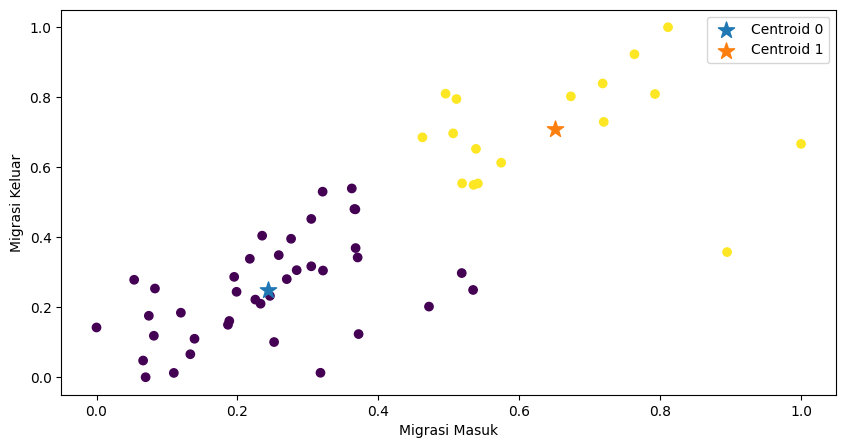

In [43]:
plt.figure(figsize=(10,5))
plt.scatter(x_train[:,0],x_train[:,1],c=kmean.labels_)
plt.scatter(kmean.cluster_centers_[0,0],kmean.cluster_centers_[0,1],cmap='rainbow',marker='*',s=150,label='Centroid 0')
plt.scatter(kmean.cluster_centers_[1,0],kmean.cluster_centers_[1,1],cmap='rainbow',marker='*',s=150,label='Centroid 1')
plt.xlabel("Migrasi Masuk")
plt.ylabel("Migrasi Keluar")
plt.legend()

Menentukan Nilai Inertias

In [44]:
inertias = []
k_range = range(1,10)
for k in k_range:
    km = KMeans(n_clusters=k).fit(x_train)
    inertias.append(km.inertia_)

In [45]:
inertias

[6.667083923703152,
 2.232720319379128,
 1.6457463924125295,
 1.1102059359354923,
 0.9719144669159233,
 0.7145010309417315,
 0.6853509156715532,
 0.4835429617955397,
 0.39888873695072224]

Visualisasi Elbow Method

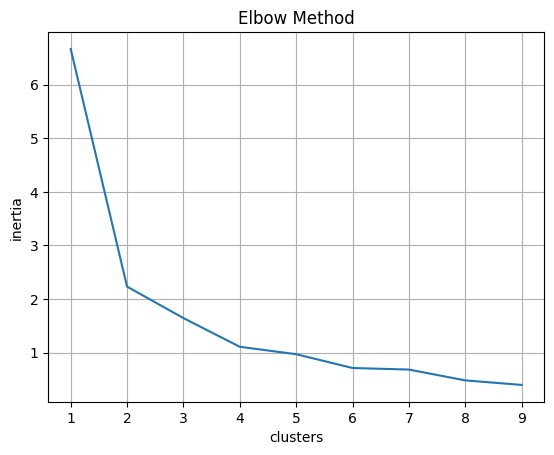

In [46]:
plt.xlabel("clusters")
plt.ylabel("inertia")
plt.plot(k_range,inertias)
plt.title("Elbow Method")
plt.grid()

Menambahkan Kolom Keterangan Cluster

In [53]:
dfmgr['keterangan'] = dfmgr['cluster'].map({0: 'Penurunan', 1: 'Peningkatan'})

In [54]:
dfmgr

,nama_desa_kelurahan,total_migrasi_masuk,total_migrasi_keluar,cluster,keterangan
0,BEKASIJAYA,5989,7336,1,Peningkatan
1,MARGAHAYU,4237,7343,1,Peningkatan
2,DURENJAYA,5285,7284,1,Peningkatan
3,ARENJAYA,4300,6458,1,Peningkatan
4,BINTARA,4491,6112,1,Peningkatan
5,KRANJI,3208,5157,0,Penurunan
6,KOTABARU,2702,4175,0,Penurunan
7,BINTARAJAYA,2468,3256,0,Penurunan
8,JAKASAMPURNA,4328,7224,1,Peningkatan
9,KALIABANG TENGAH,6098,8826,1,Peningkatan


Mendownload Dataset Final (Sudah ada label cluster)

In [55]:
%pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [56]:
dfmgr.to_excel("output_cluster.xlsx")